c:\Users\user\Desktop\QuantitativeResearch\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
C:\Users\user\AppData\Local\Temp\ipykernel_16020\1524126480.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['Dates'])
17:50:21 - cmdstanpy - INFO - Chain [1] start processing
17:50:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\user\Desktop\QuantitativeResearch\venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Estimated price for 2025-10-01: -330.6068080335776


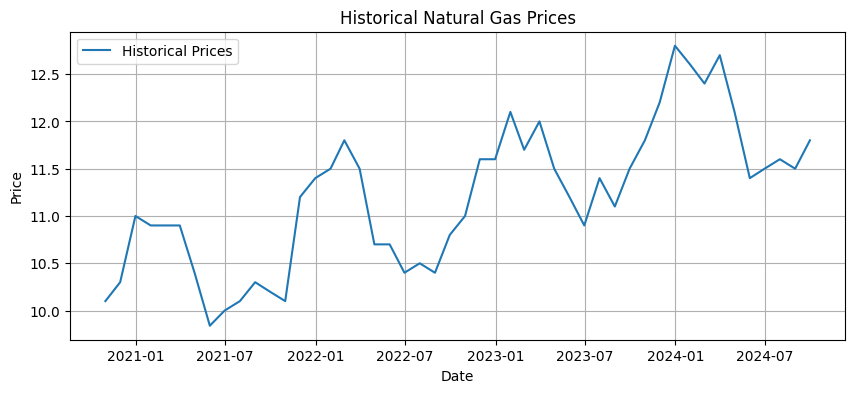

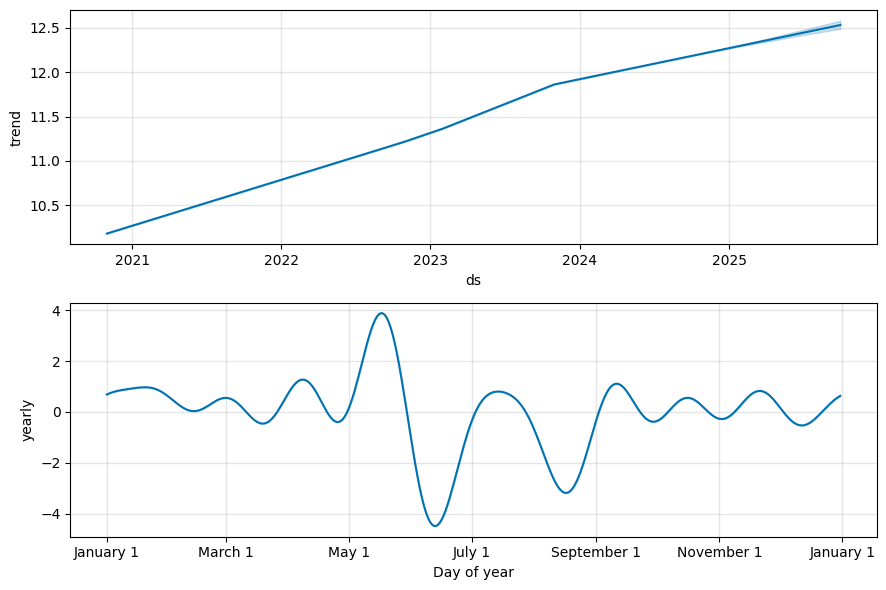

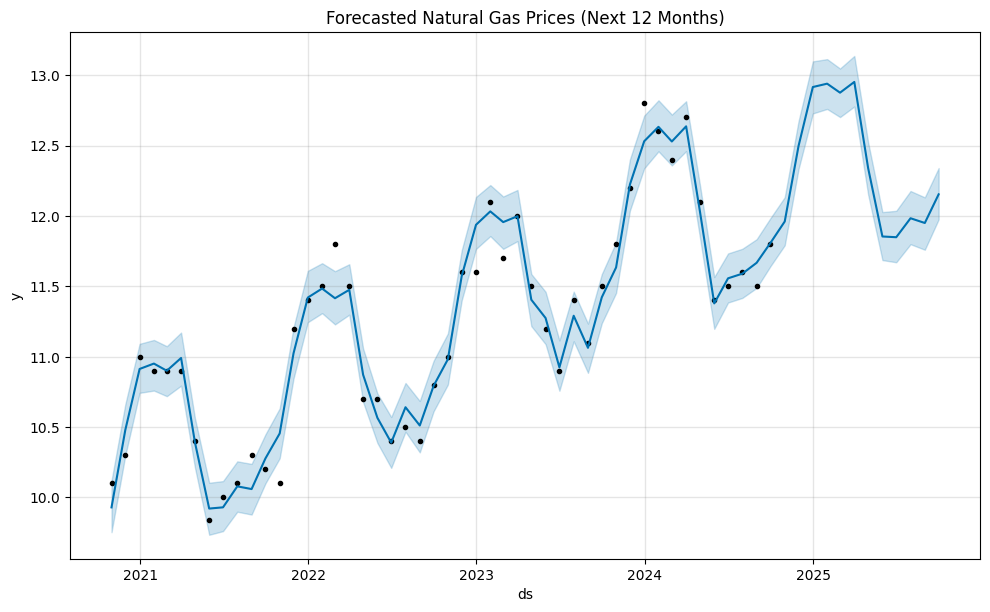

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from scipy.interpolate import interp1d
import numpy as np

# Load the CSV file
df = pd.read_csv("Nat_Gas.csv")

# Preprocess the data
df['ds'] = pd.to_datetime(df['Dates'])
df['y'] = df['Prices']
df = df[['ds', 'y']]

# Train the Prophet model
model = Prophet()
model.fit(df)

# Forecast 12 months into the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Interpolation function
interpolator = interp1d(
    forecast['ds'].astype(int),
    forecast['yhat'],
    kind='linear',
    fill_value='extrapolate'
)

# Price estimator function
def estimate_price(date_str):
    date_obj = pd.to_datetime(date_str)
    return float(interpolator(np.datetime64(date_obj).astype(int)))

# Test the function
print("Estimated price for 2025-10-01:", estimate_price("2025-10-01"))

# Visualization 1: Historical Prices
plt.figure(figsize=(10, 4))
plt.plot(df['ds'], df['y'], label='Historical Prices')
plt.title("Historical Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Seasonality Components
model.plot_components(forecast)
plt.show()

# Visualization 3: Forecast
model.plot(forecast)
plt.title("Forecasted Natural Gas Prices (Next 12 Months)")
plt.show()
